# Week 4 handin

## 01 Assignment
Here is the text for the assignment linked to

## 02 Status
Alle opgaverne undtagen de ekstra er løst


## 03 Solution part 1

In [1]:
# 1.2 Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
import numpy as np

filename = '/home/jovyan/data/befkbhalderstatkode.csv' 
bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1) 
dd = bef_stats_df

In [2]:
#1.3 Find out how many people lived in each of the 11 areas in 2015

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

def get_total(n, mask):
    all_people = dd[mask & (dd[:,1] == n)]
    sum = all_people[:,4].sum()
    return sum

year_mask = (dd[:, 0] == 2015)

total = np.array([get_total(n, year_mask) for n in neighb.keys()])
print(total)

dict_with_totals = {'Indre By': total[0], 'Østerbro': total[1], 'Nørrebro': total[2], 'Vesterbro/Kgs. Enghave': total[3], 
               'Valby': total[4], 'Vanløse': total[5], 'Brønshøj-Husum': total[6], 'Bispebjerg': total[7], 'Amager Øst': total[8], 'Amager Vest': total[9], 'Udenfor': total[10]}


sorted_dict = sorted(dict_with_totals.items(), key=lambda x: x[1])    
print(sorted_dict)

[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]
[('Udenfor', 3872), ('Vanløse', 39537), ('Brønshøj-Husum', 43908), ('Valby', 51727), ('Indre By', 51937), ('Bispebjerg', 53604), ('Amager Øst', 55205), ('Vesterbro/Kgs. Enghave', 61623), ('Amager Vest', 64967), ('Østerbro', 75113), ('Nørrebro', 78802)]


<IPython.core.display.Javascript object>


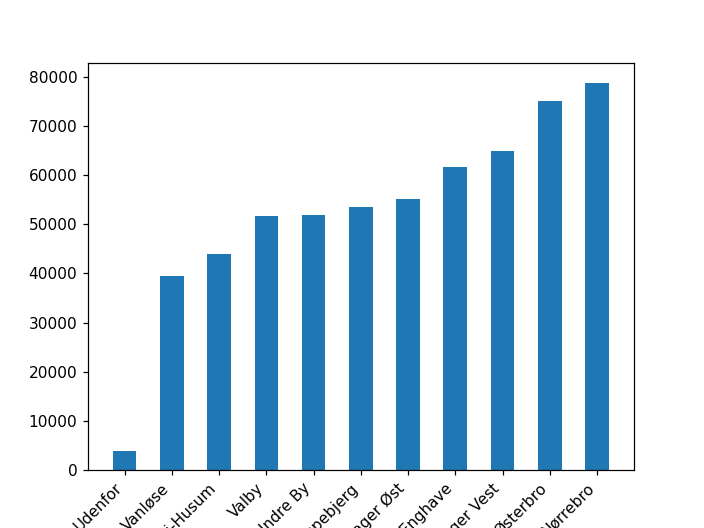

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [3]:
#1.4 Make a bar plot to show the size of each city area from the smallest to the largest

%matplotlib notebook
import matplotlib.pyplot as plt
plt.bar([val[0] for val in sorted_dict],[val[1] for val in sorted_dict],width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [4]:
#1.5 Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

age_mask = (dd[:, 0] == 2015) & (dd[:, 2] > 65)

total = np.array([get_total(n, age_mask) for n in neighb.keys()])
print(sum(total))

55750.0


In [5]:
#1.6 How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"

non_dk_mask = (dd[:, 0] == 2015) & (dd[:, 3] != 5100)

total = np.array([get_total(n, non_dk_mask) for n in neighb.keys()])
print(sum(total))

87681.0


[110075 110172 110588 111205 112237 114131 115257 115815 116985 117633
 118059 118595 118385 118314 117654 118294 119430 122120 125266 128088
 130811 132599 134849 136736]


<IPython.core.display.Javascript object>


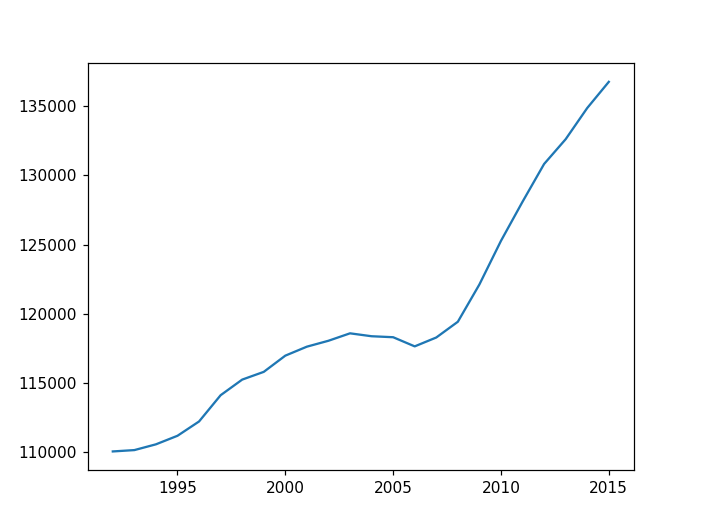

In [45]:
#1.7 Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
def get_total(n, mask):
    all_people = dd[mask & (dd[:,1] == n)]
    sum = all_people[:,4].sum()
    return sum

def get_from_distr(year):
    all_people = dd[((dd[:, 1] == 2) | (dd[:,1] == 4)) & (dd[:,0] == year)]
    sum = all_people[:,4].sum()
    return sum

total_by_year = np.array([get_from_distr(year) for year in range(1992,2016)])
print(total_by_year)

plt.plot(list(range(1992,2016)),total_by_year)
